<center> <img src="ups.png">

# Simulation Intercycle Project

</center>

## Simulation Project

**Names:** Alexandra Guamán - Diego Cabrera

### Integration of Monte Carlo

**Definition**
<div alogn="justify">
This project is about the implementation of Integration of Monte Carlo in python for resolve
single, double or triple integrals. Estimating the error in each iteration until it is as small as possi-
ble.
</div>

**Integration of Montecarlo**

<br>

<div alogn="justify">
The Monte Carlo method is a statistical (non-deterministic) method that provides approximate
solutions to a wide variety of mathematical problems, making it possible to carry out experiments
with samples of pseudorandom numbers on a computer. The method is applicable to any type of
problem, whether stochastic or deterministic.</div>

<br>

<div alogn="justify">
In the case of a single variable, the procedure is as follows: Generate a series of random num-
bers, r1, r2, . . . , rm, evenly distributed in [0,1]. Use this sequence to produce another sequence, x1,
x2, . . . , xm, distributed according to the pdf in which we are interested. Use the sequence of values
x to estimate some property of f (x). The values of x can be treated as simulated measurements
and from them you can estimate the probability that x will take values in a certain region.
In this case, the following equation will be solved: </div>



### Error

**Is there a way to estimate the error?**
<div alogn="justify">
The answer is if, however, not all numerical methods can do that, as are the quadrature integra-
tion methods, however in Monte Carlo methods, there is a way to estimate this error conditioned
to certain guidelines. For experimental purposes in quadrature integration methods, the absolute
error is defined to validate the method and be able to analyze whether the method really con-
verges to the solution. The real error is defined below and a way to estimate the error in some
Monte Carlo integration methods.</div>

<br>

<div alogn="justify">
In quadrature methods the absolute error is defined as the absolute value of the difference of
the value of the integral I and the approximate value In, that is: </div>

<center><img src="error.png"></center>

Inicializado
============  ========  ====
 Resultados    Error     N
============  ========  ====
  -3.69542    9.59129    1
  -6.46487    3.02546    10
  -9.07684    0.569292  100
  -8.2955     0.179581  1000
============  ========  ====
Termino


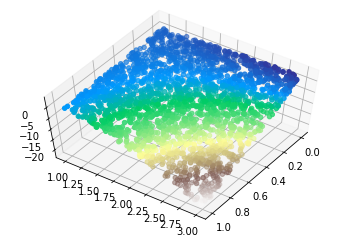

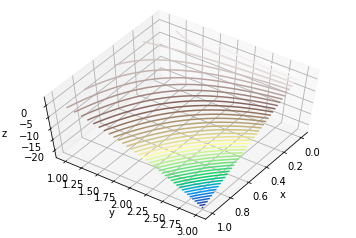

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt 
from tabulate import tabulate 
from mpl_toolkits import mplot3d

%matplotlib inline

class Montecarlo:
    datosX = []
    datosY = []
    datosZ = []
    def funcion(self,x,y,grafica):
        res=y+x-3*x*np.power(y,2.0)
        if(grafica):
            self.datosX.append(x)
            self.datosY.append(y)
            self.datosZ.append(res)
        return res
    def integral(self,ax,bx,ay,by,n):
        suma = 0;
        suma = 0;
        for i in range(n):
            rX = random.random()
            rY = random.random()
            x = (bx-ax) * rX + ax
            y = (by-ay) * rY + ay
            z = self.funcion(x,y,True)
            suma += z
            sumaC = z**2.0
            res = (((bx -ax)*(by -ay))/n)*suma
            resC = (1/n)* sumaC
        return res,resC
    def error(self,ax,bx,ay,by,n):
        res,resC = self.integral(ax,bx,ay,by,n)
        return(bx-ax)*(by-ay)*np.sqrt((resC - res)/n)
    def reiniciarArreglo(self):
        self.xdata = []
        self.ydata = []
        self.zdata = []
        
    def grafica(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.view_init(60,35)
        ax.scatter3D(self.datosX,self.datosY,self.datosZ,c=self.datosZ,cmap='terrain_r');

final = Montecarlo()

ax = 0
bx = 1
ay = 1
by = 3

n = 1

errorCondicion = 0.5
errorObtenido = 1

resultado = []
error = []
interacions = []
print ("Inicializado")

while(errorObtenido >errorCondicion):
    final.reiniciarArreglo()
    res,resCuadrado = final.integral(ax,bx,ay,by,n)
    interacions.append(n)
    resultado.append(res)
    if((resCuadrado-res)> 0):
        errorObtenido = final.error(ax,bx,ay,by,n)
        error.append(errorObtenido)
    else:
        error.append("No estimable")
    
    if(errorObtenido > errorCondicion):
        n = n*10

resultados={"Resultados":resultado,"Error":error,"N":interacions}
print(tabulate(resultados, headers ='keys',tablefmt='rst',numalign = 'center'))

final.grafica()

print("Termino")

x=np.linspace(ax,bx,30)
y=np.linspace(ay,by,30)

X,Y =np.meshgrid(x,y)
Z= final.funcion(X,Y,False)
fig=plt.figure()
ax= plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60,35)
plt.show()